DATA SCIENCE USING PYTHON EXP-3

SHABARI PRAKASH SV 21C085

In [15]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
df=pd.read_csv('./loan_data.csv')


In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


DESCRIPTIVE STATISTICAL ANALYSIS 

Measures of Central Tendency: Mean , Median, Mode

In [20]:
df["LoanAmount"].mean()

104.98687664041995

In [21]:
df["Education"].mode()

0    Graduate
Name: Education, dtype: object

In [22]:
df["LoanAmount"].median()

110.0

Measures of Variablilty: Standard Deviation,Variance,Percentiles

In [25]:
df["LoanAmount"].std(ddof=1)


28.358463620287388

In [29]:
df["LoanAmount"].var(ddof=1)


804.2024589031633

In [32]:
x=df["LoanAmount"]
np.percentile(x,[25,50,75])

array([ 90., 110., 127.])

In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


DATA PRE-PR0CESSING AND FEATURE ENGINEERING

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


There are totally 381 rows, but Credit_History,Loan_Amount_Term,Gender,Dependents,Self Employed are missing some rows

In [34]:
#drop unnecessary columns
cols=["Gender","Married","Self_Employed","Dependents"]
df=df.drop(cols,axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Education          381 non-null    object 
 2   ApplicantIncome    381 non-null    int64  
 3   CoapplicantIncome  381 non-null    float64
 4   LoanAmount         381 non-null    float64
 5   Loan_Amount_Term   370 non-null    float64
 6   Credit_History     351 non-null    float64
 7   Property_Area      381 non-null    object 
 8   Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 26.9+ KB


In [36]:
#fill missing rows
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].interpolate()
df["Credit_History"]=df["Credit_History"].interpolate()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Education          381 non-null    object 
 2   ApplicantIncome    381 non-null    int64  
 3   CoapplicantIncome  381 non-null    float64
 4   LoanAmount         381 non-null    float64
 5   Loan_Amount_Term   381 non-null    float64
 6   Credit_History     381 non-null    float64
 7   Property_Area      381 non-null    object 
 8   Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 26.9+ KB


In [38]:
X=df.values
X

array([['LP001003', 'Graduate', 4583, ..., 1.0, 'Rural', 'N'],
       ['LP001005', 'Graduate', 3000, ..., 1.0, 'Urban', 'Y'],
       ['LP001006', 'Not Graduate', 2583, ..., 1.0, 'Urban', 'Y'],
       ...,
       ['LP002978', 'Graduate', 2900, ..., 1.0, 'Rural', 'Y'],
       ['LP002979', 'Graduate', 4106, ..., 1.0, 'Rural', 'Y'],
       ['LP002990', 'Graduate', 4583, ..., 0.0, 'Semiurban', 'N']],
      dtype=object)

OUTLIER ANALYSIS AND VISUALIZATION USING BOX PLOT AND SCATTER PLOT AND DATA VISUALIZATION

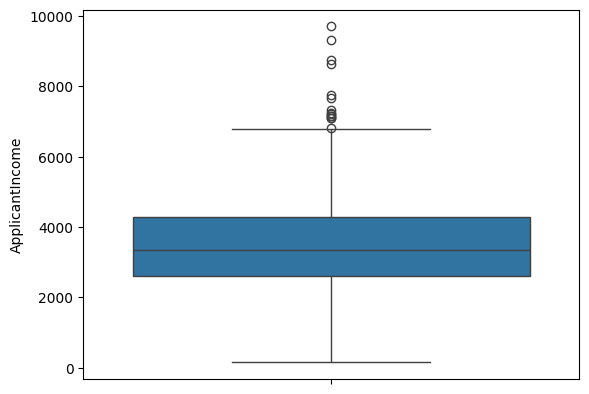

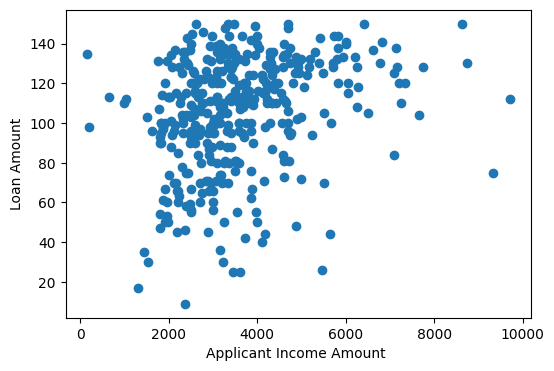

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df["ApplicantIncome"])
fig,ax=plt.subplots(figsize=(6,4))
ax.scatter(df['ApplicantIncome'],df['LoanAmount'])
ax.set_xlabel("Applicant Income Amount ")
ax.set_ylabel("Loan Amount")
plt.show()

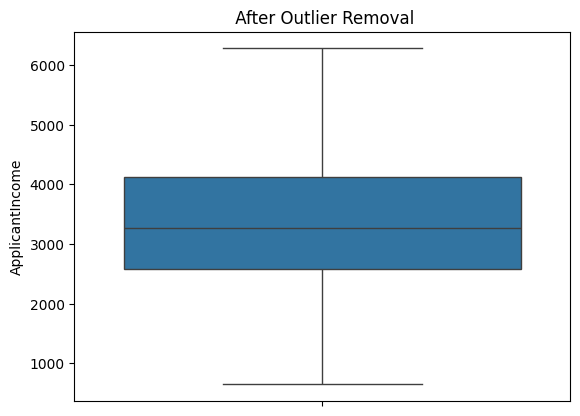

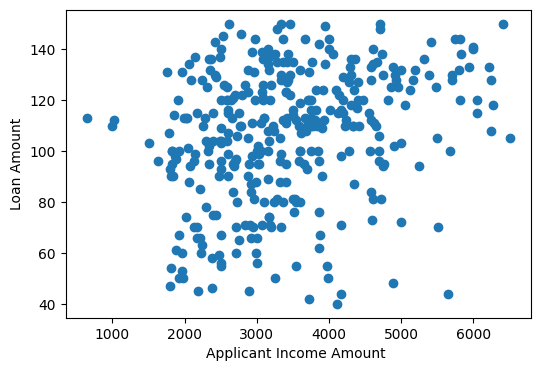

In [60]:
#remove outliers
t1,t2=6400,500
removed_outlier=df[df["ApplicantIncome"]<=t1] 
removed_outlier=removed_outlier[removed_outlier["ApplicantIncome"]>=t2]
sns.boxplot(removed_outlier["ApplicantIncome"])
plt.title(" After Outlier Removal")
plt.show()

out_index=np.where(((df['ApplicantIncome']>6500) | (df['ApplicantIncome']<500)) | (df['LoanAmount']<40))
no_ouliers=df.drop(out_index[0])
fig,ax=plt.subplots(figsize=(6,4))
ax.scatter(no_ouliers['ApplicantIncome'],no_ouliers['LoanAmount'])
ax.set_xlabel("Applicant Income Amount ")
ax.set_ylabel("Loan Amount")
plt.show()


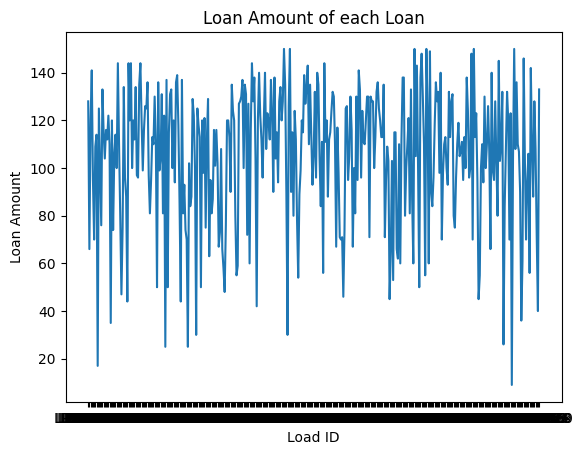

In [63]:
dfs=df.sort_values(by="Loan_ID")
plt.plot(dfs["Loan_ID"],dfs["LoanAmount"])
plt.xlabel("Load ID")
plt.ylabel("Loan Amount")
plt.title("Loan Amount of each Loan")
plt.show()

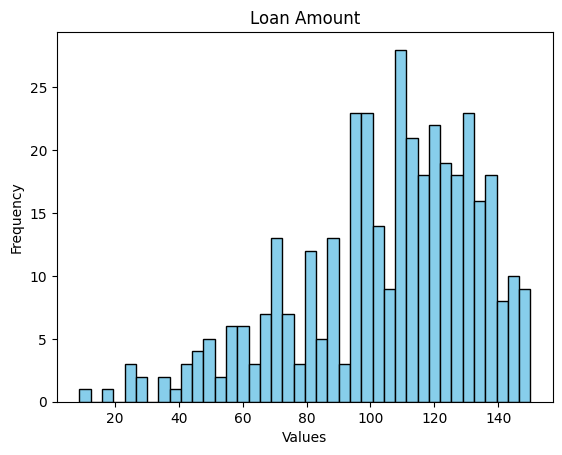

In [69]:
data=np.array(df['LoanAmount'])
plt.hist(data,bins=40,color='skyblue',edgecolor='black')
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Loan Amount")
plt.show()

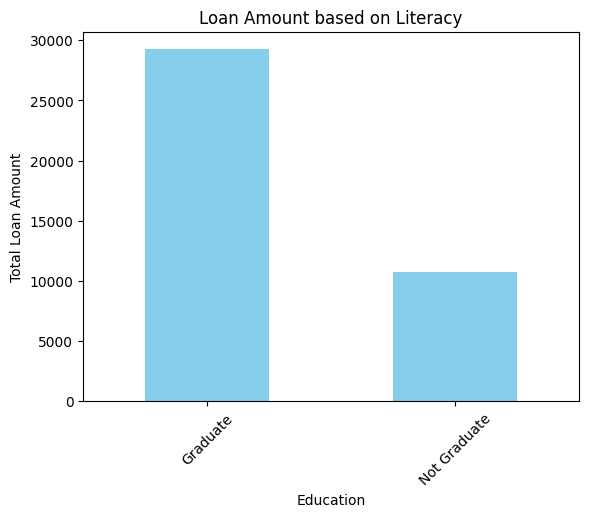

In [75]:
ag_data=df.groupby("Education")["LoanAmount"].sum()
ag_data.plot(kind="bar",color="skyblue")
plt.xlabel("Education")
plt.ylabel("Total Loan Amount")
plt.title("Loan Amount based on Literacy")
plt.xticks(rotation=45)
plt.show()